In [4]:
%load_ext autoreload
%autoreload 2
from helpers import *
from NLP import *
from SentenceSplitterML import *
from TokenizerML import *
from lexicons import *
import nltk as nltk
from Parser import *
from grammar import *
import daft
import matplotlib.pyplot as plt
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading and tokenizing sentences

In [2]:
name = 'p2_data1'
text = get_text(name)
tokenizer = NLP(text)
tokenizer.sentence_split()
sentences = tokenizer.sentences
for sentence in sentences:
    t = NLP(sentence)
    t.tokenize()
    tokens = t.dirty_tokens
    print(nltk.pos_tag(tokens[0:-1]))

[('I', 'PRP'), ('bought', 'VBD'), ('a', 'DT'), ('present', 'JJ'), ('for', 'IN'), ('my', 'PRP$'), ('friend', 'NN'), ('yesterday', 'NN')]
[('I', 'PRP'), ('enjoy', 'VBP'), ('historical', 'JJ'), ('novels', 'NNS')]
[('I', 'PRP'), ('helped', 'VBD'), ('my', 'PRP$'), ('mother', 'NN'), ('with', 'IN'), ('dinner', 'NN'), ('yesterday', 'NN')]
[('Epics', 'NNS'), ('tell', 'VBP'), ('about', 'IN'), ('our', 'PRP$'), ('national', 'JJ'), ('culture', 'NN'), ('and', 'CC'), ('history', 'NN')]
[('Watermelon', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('most', 'RBS'), ('beautiful', 'JJ'), ('fruit', 'NN'), ('of', 'IN'), ('summer', 'NN')]
[('Will', 'MD'), ('you', 'PRP'), ('attend', 'VB'), ('the', 'DT'), ('meeting', 'NN'), ('tonight', 'NN')]
[('We', 'PRP'), ('watched', 'VBD'), ('the', 'DT'), ('moonlight', 'NN'), ('under', 'IN'), ('this', 'DT'), ('tree', 'NN'), ('every', 'DT'), ('night', 'NN')]
[('When', 'WRB'), ('did', 'VBD'), ('you', 'PRP'), ('come', 'VB'), ('here', 'RB'), ('lastly', 'RB')]
[('The', 'DT'), ('school

In [3]:
# nltk.download()
text = nltk.tokenize.word_tokenize("I buys a gift for my friend")
tag = nltk.pos_tag(text)
print(tag)

[('I', 'PRP'), ('buys', 'VBP'), ('a', 'DT'), ('gift', 'NN'), ('for', 'IN'), ('my', 'PRP$'), ('friend', 'NN')]


[('Get', 'VB'), ('the', 'DT'), ('flight', 'NN'), ('through', 'IN'), ('Huston', 'NNP')]
[[], [], [[(0, 0, 1, 'Verb'), (1, 2, 0, 'NP'), 'S'], [(0, 0, 1, 'Verb'), (1, 2, 0, 'NP'), 'VP'], [(0, 0, 1, 'Verb'), (1, 2, 0, 'NP'), 'X3']], [], [[(0, 0, 1, 'Verb'), (1, 4, 0, 'NP'), 'S'], [(0, 0, 1, 'Verb'), (1, 4, 0, 'NP'), 'VP'], [(0, 0, 1, 'Verb'), (1, 4, 0, 'NP'), 'X3'], [(0, 0, 1, 'Verb'), (1, 4, 1, 'NP'), 'S'], [(0, 0, 1, 'Verb'), (1, 4, 1, 'NP'), 'VP'], [(0, 0, 1, 'Verb'), (1, 4, 1, 'NP'), 'X3'], [(0, 2, 1, 'VP'), (3, 4, 0, 'PP'), 'S'], [(0, 2, 1, 'VP'), (3, 4, 0, 'PP'), 'VP'], [(0, 2, 2, 'X3'), (3, 4, 0, 'PP'), 'VP']]]
[[], [], [[(1, 1, 1, 'Det'), (2, 2, 3, 'Nominal'), 'NP']], [], [[(1, 1, 1, 'Det'), (2, 4, 1, 'Nominal'), 'NP'], [(1, 2, 0, 'NP'), (3, 4, 0, 'PP'), 'NP']]]
[[], [], [], [], [[(2, 2, 2, 'NP'), (3, 4, 0, 'PP'), 'NP'], [(2, 2, 3, 'Nominal'), (3, 4, 0, 'PP'), 'Nominal']]]
[[], [], [], [], [[(3, 3, 1, 'Prep'), (4, 4, 1, 'NP'), 'PP']]]
[[], [], [], [], []]
[S [Verb 'Get'] [NP [Det '

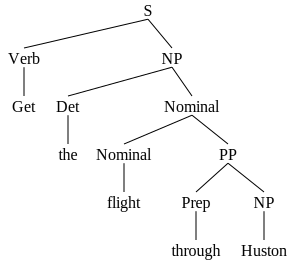

[S [Verb 'Get'] [NP [NP [Det 'the'] [Nominal 'flight']] [PP [Prep 'through'] [NP 'Huston']]]]


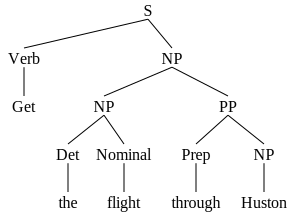

[S [VP [Verb 'Get'] [NP [Det 'the'] [Nominal 'flight']]] [PP [Prep 'through'] [NP 'Huston']]]


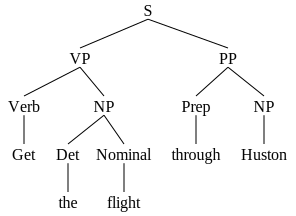

In [12]:
text = "I bought a red gift for my friend yesterday"
text = "Get the flight through Huston"
# text = "The flight includes a meal"
# text = "I shot an elephant in my pajamas"
# text = "You are the fast car mechanic"
# text = "Workers dumped sacks into a bin"
# text = "Fishermen caught tons of those herrings"
# text = "Will you attend the last meeting tomorrow"
# text = "I enjoy historical novels"
# text = "Watermelon is the beautiful fruit of summer"
# text = "We watched the moonlight under this tree"
# text = "Mary loves herself"
# text = "What airline goes to Texas"
# text = "Epics tell about our national culture and history"

p = Parser(text)
print(p.parsed_text)
table, link_table = p.parse()
p.save_table("data/parse_table.txt")
for tab in link_table:
    print(tab)
# print(p.grammar_rules) # full grammar with CNF
p.make_tree()
